<a href="https://colab.research.google.com/github/andugu/APA-Laboratory/blob/main/practicaAPA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans
from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion 
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import Normalizer
from sklearn.impute import SimpleImputer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import RFECV

# If running in local
#%matplotlib notebook

# If running in colab:
%matplotlib inline

class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names): 
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values

In [ ]:
data = pd.read_csv('imports-85.data')
# remove samples without price 
data = data[data['price'] != '?']
# change ? for Nan
data = data.replace('?', np.nan)



# Preprocessing  

1. Apply SimpleInputer to missing value OK 
2. Categorical -> numerical (OrdinalEncoder) OK 
3. Min max scaling OK 
4. Dimensionality reduction OK 
5. Outlier detection OK 
6. Feature extraction new features through transformation (x^2 log(x))
7. Correction of serious skewness and/or kurtosis OK 
8. Parameter search (model testing)

Falta: 
    - Documentació 
    - Model training 

**Add correlation table**

## New features 
Horse power / consum 



In [ ]:
data['price']

Most points are below 20000

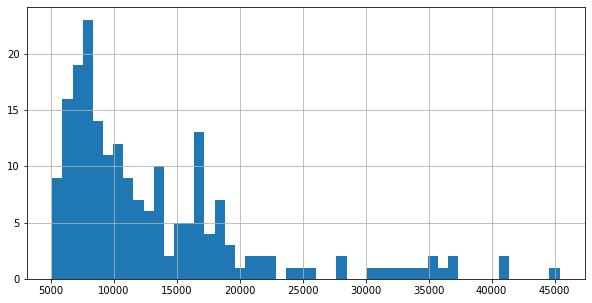

In [ ]:
pd.to_numeric(data['price']).hist(bins=50, figsize=(10, 5))
plt.show()

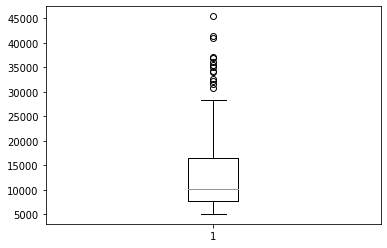

In [ ]:
plt.boxplot(data['price'].astype(float))
plt.show()

In [ ]:
data['price'].mean()
data = data[data['price'].astype(float) < 30000]

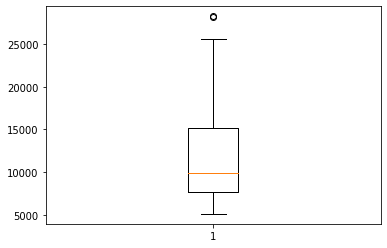

In [ ]:
plt.boxplot(data['price'].astype(float))
plt.show()

In [ ]:
price = data['price'].astype(float)
kmeans = KMeans()
pred = kmeans.fit_predict(np.array(price).reshape(-1, 1))
for i in range(8): 
    label = price[pred == i]
    plt.scatter(np.arange(len(label)), price[pred == i])

In [ ]:
kmeans.cluster_centers_

In [ ]:
data.head()

In [ ]:
data.describe()

In [ ]:
data.hist(bins=50, figsize=(20, 15))
plt.show()

8. Missing Attribute Values: (denoted by "?")
   Attribute #:   Number of instances missing a value:
   2.             41
   6.             2
   19.            4
   20.            4
   22.            2
   23.            2
   26.            4

In [ ]:
categorical_features = ['make', 'fuel-type', 'aspiration', 
                        'num-of-doors', 'body-style', 
                        'drive-wheels', 'engine-location', 
                        'fuel-system', 'engine-type', 
                        'num-of-cylinders']

prediction_col = 'price'
numerical_features = [col for col in data.columns if not col in categorical_features][:-1]


categorical_pipeline = Pipeline([('DataframeSelector', DataFrameSelector(categorical_features)), 
                                 ('Inputer', SimpleImputer(strategy='most_frequent')),
                                 ('OrdinalEncoder', OrdinalEncoder()), 
                                 ('MinMaxScaling', Normalizer())])

numerical_pipeline = Pipeline([ ('DataframeSelector', DataFrameSelector(numerical_features)), 
                                ('Inputer', SimpleImputer()),
                                ('MinMaxScaling', Normalizer())])

full_pipeline = FeatureUnion(transformer_list=[
                            ('num_pipeline', numerical_pipeline),
                            ('cat_pipeline', categorical_pipeline)
])

In [ ]:
data.columns 

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')

In [ ]:
X = np.array(full_pipeline.fit_transform(data))
y = np.array(data[prediction_col].astype(float))

In [ ]:
numerical_features

In [ ]:
data.corr()

In [ ]:
f = plt.figure(figsize=(19, 15))
plt.matshow(data.corr(), fignum=f.number)
plt.xticks(range(data.shape[1]), data.columns, fontsize=14, rotation=45)
plt.yticks(range(data.shape[1]), data.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

In [ ]:

kmeans = KMeans()
pred = kmeans.fit_predict(data)
for i in range(8): 
    label = data[pred == i][-1]
    plt.scatter(np.arange(len(label)), label)

plt.show()

In [ ]:
X

array([[ 5.33840604e-04,  2.17095179e-02,  1.57660925e-02, ...,
         8.45154255e-01,  0.00000000e+00,  3.38061702e-01],
       [ 5.33840604e-04,  2.17095179e-02,  1.57660925e-02, ...,
         8.45154255e-01,  0.00000000e+00,  3.38061702e-01],
       [ 1.73873745e-04,  2.12125969e-02,  1.64310689e-02, ...,
         6.45497224e-01,  5.16397779e-01,  3.87298335e-01],
       ...,
       [-1.59241761e-04,  1.51279673e-02,  1.73732762e-02, ...,
         2.22497080e-01,  1.77997664e-01,  1.33498248e-01],
       [-1.72805396e-04,  1.64165126e-02,  1.88530687e-02, ...,
         1.37360564e-01,  9.15737093e-02,  1.37360564e-01],
       [-1.60884390e-04,  1.52840170e-02,  1.75524869e-02, ...,
         2.26107816e-01,  9.04431263e-02,  9.04431263e-02]])

In [ ]:
print(X.shape)
print(y.shape)

(201, 25)
(201,)


# Model training

In [ ]:
model = RandomForestRegressor(max_depth=2)
selector = RFECV(model, step=1, cv=10, scoring='neg_mean_squared_error', n_jobs=4)
selector.fit(X, y)
selector.ranking_

array([22, 21, 10, 18, 20, 16,  2,  1, 17, 13, 12,  1,  1,  3,  1, 14,  8,
        4, 15,  9,  6, 19,  5, 11,  7])

In [ ]:
selector.ranking_ == 1

array([False, False, False, False, False, False,  True,  True, False,
       False, False,  True,  True,  True,  True, False, False, False,
       False, False, False, False, False, False, False])

In [ ]:
kf = KFold(n_splits=10, shuffle=True)
model = RandomForestRegressor(max_depth=2)
X_data = np.array(X)[:, selector.ranking_ < 5]
y_data = np.array(y)
errors_train = []
errors_test = []
for train_index, test_index in kf.split(X_data):
    model.fit(X_data[train_index], y_data[train_index])
    y_train_pred = model.predict(X_data[train_index])
    y_test_pred = model.predict(X_data[test_index])
    errors_train.append(mean_absolute_error(y_data[train_index], y_train_pred))
    errors_test.append(mean_absolute_error(y_data[test_index], y_test_pred))
    print('Train error:', mean_absolute_error(y_data[train_index], y_train_pred))
    print('Test error:', mean_absolute_error(y_data[test_index], y_test_pred))

Train error: 1622.9877327409845
Test error: 1788.1091743442191
Train error: 1702.4866726176274
Test error: 1754.2086490739105
Train error: 1681.5508277402473
Test error: 1326.7234178767087
Train error: 1573.4019766317394
Test error: 2891.692102690392
Train error: 1593.689949406324
Test error: 2244.930841982939
Train error: 1613.356609183623
Test error: 2187.5067688345916
Train error: 1640.3246298538627
Test error: 1675.9933660182403
Train error: 1631.713532411078
Test error: 1887.7030624820165
Train error: 1687.8952907163825
Test error: 1821.1521874020534
Train error: 1652.7256645194768
Test error: 1651.7615868527585


In [ ]:
print('Train mean:', np.array(errors_train).mean())
print('Test mean:', np.array(errors_test).mean())

Train mean: 1640.0132885821345
Test mean: 1922.9781157557832


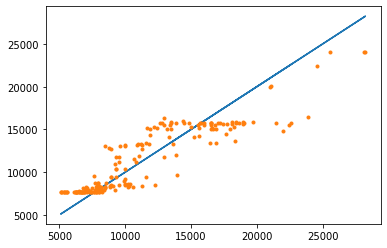

In [ ]:
plt.plot(y_data, y_data)
plt.plot(y_data, model.predict(X_data), '.')

plt.show()

Nota: la distribution tiene forma normal pero no esta centrada en el cero => hace predicciones de numeros mas grandes

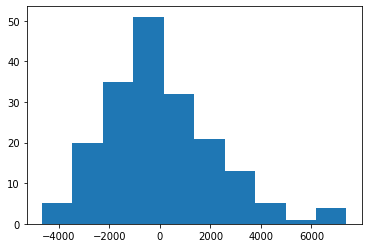

In [ ]:
plt.hist(y_data - model.predict(X_data))
plt.show()

In [ ]:
numerical_features + categorical_features

['symboling',
 'normalized-losses',
 'wheel-base',
 'length',
 'width',
 'height',
 'curb-weight',
 'engine-size',
 'bore',
 'stroke',
 'compression-ratio',
 'horsepower',
 'peak-rpm',
 'city-mpg',
 'highway-mpg',
 'make',
 'fuel-type',
 'aspiration',
 'num-of-doors',
 'body-style',
 'drive-wheels',
 'engine-location',
 'fuel-system',
 'engine-type',
 'num-of-cylinders']

In [ ]:
import sklearn
sorted(sklearn.metrics.SCORERS.keys())

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'roc_auc_ovo',
 'roc_auc_ovo_weighted',
 'roc_auc_ovr',
 'roc_auc_ovr_weighted',
 'v_measure_score']